<a href="https://colab.research.google.com/github/begitawahyuningtyas/Pemograman_Python10/blob/main/TUGAS11_Klasifikasi_Daun_BEGITA_WAHYUNINGTYAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101208451_1101208446_1101208338 (1).zip'
 1101208451_1101208446_1101208338.mp4
 1101208451_1101208446_1101208338.zip
 3scene@
'BEGITA WAHYUNINGTYAS-1101208338.pdf'
 Dataset/
'LEMBAR JAWABAN QUIZ PROBABILITAS.pdf'
 nnmodel_scene/
'Pemograman Python'/
'PROBSTAT1-BEGITA WAHYUNINGTYAS-1101208338(TTX-44-01) (1).pdf'
'PROBSTAT1-BEGITA WAHYUNINGTYAS-1101208338(TTX-44-01) (2).pdf'
'PROBSTAT1-BEGITA WAHYUNINGTYAS-1101208338(TTX-44-01) (3).pdf'
'PROBSTAT1-BEGITA WAHYUNINGTYAS-1101208338(TTX-44-01) (4).pdf'
'PROBSTAT1-BEGITA WAHYUNINGTYAS-1101208338(TTX-44-01).pdf'
'QUIZ2- PROBATS_BEGITA WAHYUNINGTYAS_1101208338_TTX-44-01.pdf'
'Transkip Nilai - Begita Wahyuningtyas.pdf'


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [42]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (5,5), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (5,5), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(150, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 60, 60, 8)         608       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 16)        3216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               405750    
_________________________________________________________________
dense_9 (Dense)              (None, 5)               

In [43]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [44]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 5)                 85        
Total params: 1,230,873
Trainable params: 1,230,873
Non-trainable params: 0
_________________________________________________________________


In [45]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [46]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=22, batch_size=30)

Epoch 1/22
15/15 [==============================] - 1s 95ms/step - loss: 1.6943 - accuracy: 0.2169 - val_loss: 1.5799 - val_accuracy: 0.2740
Epoch 2/22
15/15 [==============================] - 1s 87ms/step - loss: 1.4899 - accuracy: 0.3790 - val_loss: 1.4786 - val_accuracy: 0.3288
Epoch 3/22
15/15 [==============================] - 1s 88ms/step - loss: 1.2717 - accuracy: 0.4612 - val_loss: 1.4162 - val_accuracy: 0.4178
Epoch 4/22
15/15 [==============================] - 1s 86ms/step - loss: 1.0865 - accuracy: 0.5776 - val_loss: 1.2790 - val_accuracy: 0.4863
Epoch 5/22
15/15 [==============================] - 1s 87ms/step - loss: 0.9502 - accuracy: 0.6370 - val_loss: 1.2242 - val_accuracy: 0.5205
Epoch 6/22
15/15 [==============================] - 1s 88ms/step - loss: 0.8733 - accuracy: 0.6416 - val_loss: 1.1154 - val_accuracy: 0.5890
Epoch 7/22
15/15 [==============================] - 1s 86ms/step - loss: 0.7797 - accuracy: 0.6575 - val_loss: 1.1433 - val_accuracy: 0.5479
Epoch 8/22
15

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


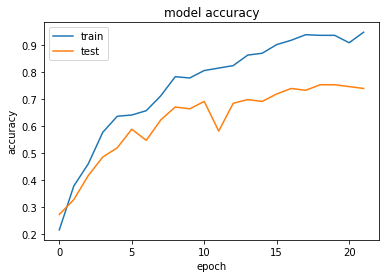

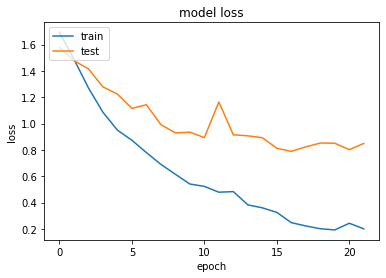

In [47]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=30)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.72      0.84      0.78        25
      GMB_02       0.79      0.77      0.78        30
      GMB_03       0.90      0.93      0.91        28
      GMB_04       0.76      0.76      0.76        29
      GMB_05       0.90      0.79      0.84        34

    accuracy                           0.82       146
   macro avg       0.81      0.82      0.81       146
weighted avg       0.82      0.82      0.82       146



In [54]:
model.save('nnmodel_daun')

INFO:tensorflow:Assets written to: nnmodel_daun/assets


In [66]:
sample='/content/drive/MyDrive/Dataset/GMB_01/IMG_20200815_201238_HDR.jpg'

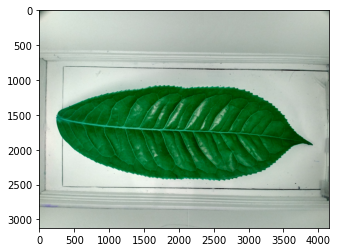

In [67]:
img_array = cv2.imread(sample)
plt.imshow(img_array)
plt.show()

In [68]:
image_testing = Image.open('/content/drive/MyDrive/Dataset/GMB_01/IMG_20200815_201238_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [69]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [70]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.18543003 0.2843802  0.10111235 0.16198194 0.26709548]]
['GMB_02']
